# Censo de trabalhadores com Regressao Logistica/linear

In [40]:
from sklearn.linear_model import LogisticRegression
import pickle

In [41]:
with open('Censo.pkl', 'rb') as f:
    X_censo_treinamento, y_censo_treinamento, X_censo_teste, y_censo_teste = pickle.load(f)

In [42]:
X_censo_treinamento.shape, y_censo_treinamento.shape

((27676, 108), (27676,))

In [43]:
X_censo_teste.shape, y_censo_teste.shape

((4885, 108), (4885,))

In [44]:
LogisticR_Censo = LogisticRegression(random_state=1, max_iter=150)
LogisticR_Censo.fit(X_censo_treinamento, y_censo_treinamento)

LogisticRegression(max_iter=150, random_state=1)

In [45]:
LogisticR_Censo.intercept_

array([-2.10474165])

In [46]:
LogisticR_Censo.coef_

array([[-6.94469649e-02,  1.18679159e-01, -9.04524759e-03,
        -7.81357460e-02,  5.76691457e-02,  5.08994420e-02,
        -8.82856549e-02, -5.01462809e-02, -1.42900810e-01,
        -1.04784027e-01, -1.19233556e-01, -3.77074867e-02,
        -2.08124820e-02, -2.93974652e-02, -8.45705964e-02,
        -8.08920718e-02, -8.16248852e-03,  1.09035256e-02,
         1.46893853e-01,  1.20194939e-01, -7.84325002e-02,
         1.45553932e-01, -4.75278833e-01,  1.14436730e-01,
         2.27948173e-02, -1.93347518e-01,  4.38094226e-02,
         7.07825942e-01, -6.57034078e-02, -5.23341515e-01,
        -1.09247966e-01, -8.94357349e-02, -7.42801130e-02,
        -1.40912231e-02, -2.06468670e-02,  2.21547856e-02,
         2.51784840e-01, -1.68183468e-01, -1.43046856e-01,
        -8.47285978e-02, -2.55735605e-01, -2.68986405e-01,
         1.61655356e-01,  8.57817041e-02,  8.33259769e-02,
         1.08967512e-01, -2.56717036e-02, -2.99250092e-02,
         1.37854640e-01, -8.45026445e-02, -3.08580420e-0

In [47]:
previsao = LogisticR_Censo.predict(X_censo_teste)
previsao

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [48]:
y_censo_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [49]:
from sklearn.metrics import accuracy_score, classification_report
LogisticR_Censo.score(X_censo_teste, y_censo_teste)

0.849539406345957

In [50]:
print(classification_report(y_censo_teste, previsao))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



0.849539406345957

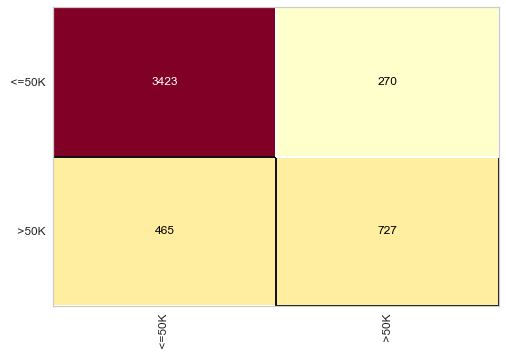

In [51]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(LogisticR_Censo)
cm.fit(X_censo_treinamento, y_censo_treinamento)
cm.score(X_censo_teste, y_censo_teste)